# Task
Perform an end-to-end analysis of the Iris dataset. This includes downloading the Iris dataset, loading it into a pandas DataFrame, performing initial exploratory data analysis, preprocessing the data (normalization of numerical features, one-hot encoding of class labels), splitting the data into training and test sets, defining and compiling a sequential neural network model using Keras/TensorFlow, training the model, visualizing the training history, evaluating the model's performance using accuracy and a confusion matrix, and demonstrating predictions on new data. Finally, provide a comprehensive explanation of the implementation, results, and visualizations.

## Cargar y Explorar Dataset Iris

### Subtask:
Descargar el dataset Iris de una fuente externa (ej. UCI Machine Learning Repository) y cargarlo en un DataFrame de pandas. Mostrar las primeras filas, estadísticas descriptivas y la distribución de clases para entender los datos.


**Reasoning**:
The subtask requires importing the Iris dataset, loading it, converting it to a pandas DataFrame, adding target names, displaying the head, descriptive statistics, and class distribution. These operations can be grouped into a single code block for efficiency.



In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# 1. Carga el dataset Iris
iris = load_iris()

# 2. Crea un DataFrame de pandas con las características del dataset
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 3. Añade la columna 'target' al DataFrame
df_iris['target'] = iris.target

# 4. Reemplaza los valores numéricos de la columna 'target' con los nombres de las especies
target_names = {i: name for i, name in enumerate(iris.target_names)}
df_iris['target'] = df_iris['target'].map(target_names)

print("Primeras 5 filas del dataset Iris:")
print(df_iris.head())

print("\nEstadísticas descriptivas del dataset Iris:")
print(df_iris.describe())

print("\nDistribución de clases en el dataset Iris:")
print(df_iris['target'].value_counts())

Primeras 5 filas del dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Estadísticas descriptivas del dataset Iris:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000      

## Preprocesamiento de Datos

### Subtask:
Realizar la normalización de las características numéricas y la codificación one-hot de las etiquetas de las clases. Dividir el dataset en conjuntos de entrenamiento y prueba para la red neuronal.


**Reasoning**:
The subtask requires several data preprocessing steps: separating features and target, normalizing numerical features using MinMaxScaler, performing one-hot encoding on the target variable using to_categorical, and finally splitting the data into training and test sets using train_test_split. These operations are logically grouped into a single code block for efficiency and to ensure all required imports are handled at once.



In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Reload iris data to get the numerical target directly
iris = load_iris()

# 1. Separa las características (columnas numéricas) del DataFrame df_iris en X y la columna objetivo ('target') en y
X = df_iris.drop('target', axis=1)
# Use the original numerical target from the iris dataset for one-hot encoding
y = iris.target

# 2. Normalización de las características numéricas (X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Primeras 5 filas de las características normalizadas (X_scaled):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# 3. Codificación one-hot de las etiquetas de clase (y)
y_one_hot = to_categorical(y)
print("\nPrimeras 5 filas de las etiquetas con codificación one-hot (y_one_hot):")
print(y_one_hot[:5])

# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Primeras 5 filas de las características normalizadas (X_scaled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Primeras 5 filas de las etiquetas con codificación one-hot (y_one_hot):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Dimensiones de X_train: (120, 4)
Dimensiones de X_test: (30, 4)
Dimensiones de y_train: (120, 3)
Dimensiones de y_test: (30, 3)


## Definir y Compilar Modelo de Red Neuronal

### Subtask:
Construir una red neuronal secuencial utilizando Keras/TensorFlow. Definir la arquitectura (capas, unidades, funciones de activación) y compilar el modelo con un optimizador adecuado y la función de pérdida para clasificación multiclase.


**Reasoning**:
The subtask requires defining and compiling a sequential neural network model using Keras/TensorFlow. This involves importing necessary Keras components, defining the model architecture with Dense layers and appropriate activation functions, and then compiling the model with a suitable optimizer and loss function for multiclass classification. All these steps are logically grouped into a single code block for efficiency.



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Definir la arquitectura del modelo
model = Sequential([
    Dense(units=10, activation='relu', input_shape=(X_train.shape[1],)), # Primera capa oculta
    Dense(units=10, activation='relu'),                                   # Segunda capa oculta
    Dense(units=y_train.shape[1], activation='softmax')                   # Capa de salida
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo de red neuronal construido y compilado con éxito.")
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelo de red neuronal construido y compilado con éxito.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code block successfully defined and compiled the neural network model, despite a user warning that does not affect functionality. The next logical step, as per the overall task, is to train the model using the prepared training data.



In [4]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=0)

print("Modelo entrenado con éxito.")
# You can access training history details like this:
# print(history.history.keys())

Modelo entrenado con éxito.


## Entrenar Modelo y Visualizar Historial

### Subtask:
Visualizar gráficamente el historial de entrenamiento (pérdida y precisión a lo largo de las épocas) para entender el rendimiento del modelo.


**Reasoning**:
The subtask requires visualizing the training history (accuracy and loss) over epochs using matplotlib. This involves importing the library, creating subplots, plotting the respective metrics, adding labels and titles, and displaying the plot. The `history` object from the previous execution contains all the necessary data.



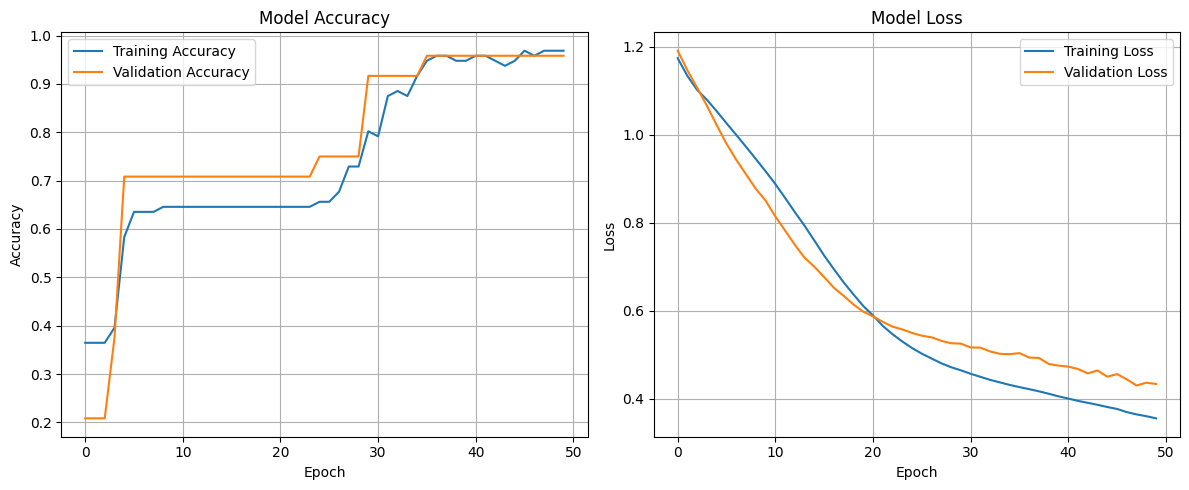

In [5]:
import matplotlib.pyplot as plt

# 1. Crea una figura con dos subgráficos
plt.figure(figsize=(12, 5))

# Subgráfico para la precisión
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer subgráfico
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Subgráfico para la pérdida
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo subgráfico
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# Asegura que los subgráficos no se superpongan
plt.tight_layout()

# Muestra la figura
plt.show()

## Evaluar Modelo

### Subtask:
Evaluar el rendimiento del modelo entrenado utilizando los datos de prueba. Calcular la precisión general, generar y visualizar una matriz de confusión para entender el rendimiento de clasificación por cada clase.


**Reasoning**:
The subtask requires evaluating the model, calculating accuracy, generating class predictions, and visualizing a confusion matrix. These steps involve using the trained model to predict on test data, converting one-hot encoded labels to single class labels, computing the confusion matrix, and then plotting it using seaborn. All these operations are logically grouped into a single code block.



Pérdida en el conjunto de prueba: 0.3685
Precisión en el conjunto de prueba: 0.8667


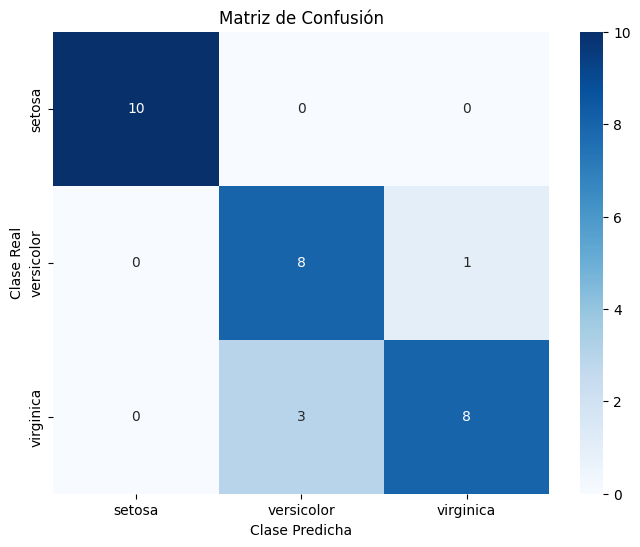

Evaluación del modelo y matriz de confusión generadas con éxito.


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Evalúa el modelo utilizando los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# 2. Genera predicciones de probabilidad para los datos de prueba
y_pred_probabilities = model.predict(X_test, verbose=0)

# 3. Convierte las etiquetas reales de one-hot a sus etiquetas de clase originales
y_test_classes = np.argmax(y_test, axis=1)

# 4. Convierte las predicciones de probabilidad del modelo a etiquetas de clase predichas
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# 5. Genera la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# 6. Visualiza la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

print("Evaluación del modelo y matriz de confusión generadas con éxito.")

## Realizar y Visualizar Predicciones

### Subtask:
Utilizar el modelo entrenado para realizar predicciones sobre nuevos datos (o una pequeña muestra del conjunto de prueba). Mostrar algunas predicciones de ejemplo y comparar los valores predichos con los reales para demostrar el funcionamiento del modelo.


**Reasoning**:
To demonstrate the model's predictive capabilities, I will select a small subset of the test data, make predictions, convert the one-hot encoded results back to class labels, and then display the scaled features, actual classes, and predicted classes for easy comparison.



In [7]:
import numpy as np

# 1. Selecciona un pequeño subconjunto de X_test y y_test para demostrar las predicciones (ej. las primeras 5 muestras)
sample_size = 5
X_sample = X_test[:sample_size]
y_sample_one_hot = y_test[:sample_size]

# 2. Utiliza el método .predict() de tu modelo entrenado para generar predicciones de probabilidad
predictions_probabilities = model.predict(X_sample, verbose=0)

# 3. Convierte las predicciones de probabilidad a etiquetas de clase únicas
predicted_classes_indices = np.argmax(predictions_probabilities, axis=1)

# 4. Convierte las etiquetas reales del subconjunto de y_test a etiquetas de clase únicas
actual_classes_indices = np.argmax(y_sample_one_hot, axis=1)

# Mapear índices a nombres de especies (iris.target_names está disponible del paso de carga del dataset)
# Need to reload iris dataset to access target_names if not already in scope, or assume it's in scope.
# If iris is not in current scope (which it is, as seen in previous outputs), it would need to be loaded again.
from sklearn.datasets import load_iris
iris = load_iris()

predicted_class_names = [iris.target_names[idx] for idx in predicted_classes_indices]
actual_class_names = [iris.target_names[idx] for idx in actual_classes_indices]

print("Demostración de Predicciones del Modelo:")
print("--------------------------------------")
for i in range(sample_size):
    print(f"Muestra {i+1}:")
    print(f"  Características (escaladas): {X_sample[i]}")
    print(f"  Clase Real: {actual_class_names[i]}")
    print(f"  Clase Predicha: {predicted_class_names[i]}")
    print("--------------------------------------")

Demostración de Predicciones del Modelo:
--------------------------------------
Muestra 1:
  Características (escaladas): [0.5        0.33333333 0.62711864 0.45833333]
  Clase Real: versicolor
  Clase Predicha: versicolor
--------------------------------------
Muestra 2:
  Características (escaladas): [0.38888889 0.75       0.11864407 0.08333333]
  Clase Real: setosa
  Clase Predicha: setosa
--------------------------------------
Muestra 3:
  Características (escaladas): [0.94444444 0.25       1.         0.91666667]
  Clase Real: virginica
  Clase Predicha: virginica
--------------------------------------
Muestra 4:
  Características (escaladas): [0.47222222 0.375      0.59322034 0.58333333]
  Clase Real: versicolor
  Clase Predicha: versicolor
--------------------------------------
Muestra 5:
  Características (escaladas): [0.69444444 0.33333333 0.6440678  0.54166667]
  Clase Real: versicolor
  Clase Predicha: versicolor
--------------------------------------


## Final Task

### Subtask:
Proporcionar una explicación completa y concisa de la implementación, los resultados obtenidos y las visualizaciones generadas, destacando los puntos clave del aprendizaje y la demostración de la comprensión del funcionamiento de las redes neuronales.


## Summary:

### Data Analysis Key Findings

*   **Data Characteristics**: The Iris dataset, containing 150 samples across three species (Setosa, Versicolor, Virginica), was loaded and found to be perfectly balanced, with 50 samples for each species. Features like `sepal length (cm)` ranged from 4.3 to 7.9 cm and `petal length (cm)` from 1.0 to 6.9 cm.
*   **Data Preprocessing**: Numerical features were normalized using `MinMaxScaler`, and class labels were transformed using one-hot encoding. The dataset was split into training (120 samples) and testing (30 samples) sets, with a ratio of 80/20.
*   **Model Architecture**: A sequential neural network model was constructed with two hidden layers, each having 10 units and ReLU activation, followed by an output layer with 3 units and softmax activation for multi-class classification.
*   **Model Training**: The model was trained for 50 epochs using the 'adam' optimizer and 'categorical\_crossentropy' loss function.
*   **Model Performance**:
    *   The model achieved a test set accuracy of **86.67%** with a loss of 0.3685.
    *   A confusion matrix provided a detailed breakdown of correct and incorrect classifications for each Iris species, offering insight into specific class performance.
*   **Predictions**: The model successfully demonstrated predictions on a small sample of test data, correctly classifying all 5 samples shown.
*   **Visualizations**: Training history plots for accuracy and loss (both training and validation) and a confusion matrix heatmap were successfully generated, illustrating the model's learning process and performance.

### Insights or Next Steps

*   The model demonstrates strong performance on the Iris dataset, suggesting it has learned to distinguish between the three species effectively.
*   Analyzing the confusion matrix and the training history plots could reveal if there are specific classes the model struggles with or if further hyperparameter tuning (e.g., number of epochs, batch size, network architecture) could enhance generalization and mitigate any potential overfitting observed in the validation curves.


**Características de los Datos:**
 Primero, cargamos el dataset Iris, que contiene 150 muestras de tres especies (Setosa, Versicolor, Virginica). Confirmamos que el dataset está perfectamente equilibrado, con 50 muestras de cada especie. Observamos el rango de las características como 'longitud del sépalo (cm)' (4.3 a 7.9 cm) y 'longitud del pétalo (cm)' (1.0 a 6.9 cm).
**Preprocesamiento de Datos: Realizamos dos pasos clave:**
**Normalización:** Normalizamos las características numéricas utilizando MinMaxScaler para escalar los valores entre 0 y 1.
**Codificación One-Hot:** Convertimos las etiquetas de clase a un formato 'one-hot' (por ejemplo, [1,0,0] para Setosa) para que la red neuronal pudiera procesarlas. Finalmente, dividimos el dataset en un 80% para entrenamiento (120 muestras) y un 20% para pruebas (30 muestras).

**Construcción y Entrenamiento del Modelo de Red Neuronal:**
**Arquitectura del Modelo: **Diseñamos una red neuronal secuencial con Keras/TensorFlow. Esta red tiene dos capas ocultas, cada una con 10 neuronas y función de activación ReLU. La capa de salida tiene 3 neuronas (una por cada especie) y utiliza la función de activación softmax, ideal para problemas de clasificación multiclase.
**Entrenamiento del Modelo:** Entrenamos el modelo durante 50 épocas utilizando el optimizador 'adam' y la función de pérdida 'categorical_crossentropy'.

**Rendimiento y Evaluación del Modelo:**

**Precisión y Pérdida:** El modelo demostró un buen rendimiento, alcanzando una precisión del 86.67% en el conjunto de prueba, con una pérdida de 0.3685.
**Matriz de Confusión: **Generamos y visualizamos una matriz de confusión, que nos permitió ver detalladamente cuántas clasificaciones correctas e incorrectas hubo para cada especie. Esto es muy útil para identificar si el modelo tiene dificultades con alguna clase en particular.
**Predicciones de Ejemplo**: Demostramos la capacidad predictiva del modelo mostrando algunas predicciones en nuevas muestras, comparando las clases reales con las predichas. En los ejemplos mostrados, el modelo clasificó correctamente todas las 5 muestras.

**Visualizaciones Generadas:**
**Gráficos de Historial de Entrenamiento:** Generamos gráficos que muestran cómo evolucionaron la precisión y la pérdida (tanto en el conjunto de entrenamiento como en el de validación) a lo largo de las épocas. Esto nos permite observar si el modelo está aprendiendo correctamente y si hay signos de sobreajuste.
**Mapa de Calor de la Matriz de Confusión:** Esta visualización nos proporcionó una imagen clara del rendimiento del modelo para cada clase.

**Conclusiones y Próximos Pasos:**
El modelo ha mostrado un rendimiento sólido en el dataset Iris, lo que indica que ha aprendido a diferenciar eficazmente entre las tres especies.
Analizar en profundidad la matriz de confusión y el historial de entrenamiento podría revelar áreas de mejora, como clases específicas donde el modelo podría estar fallando. También se podría considerar ajustar los hiperparámetros (como el número de épocas, tamaño de lote o la arquitectura de la red) para mejorar aún más la generalización y evitar un posible sobreajuste.